## Import

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [ ]:
pre_path = "../../../../../../../"
physical_model = "MIST"
path_to_data = pre_path + "data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = pre_path + "results/K_fold/"
path_to_predictions = pre_path + "predictions/K_fold/"
tag = "T_eff_smaller_4"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


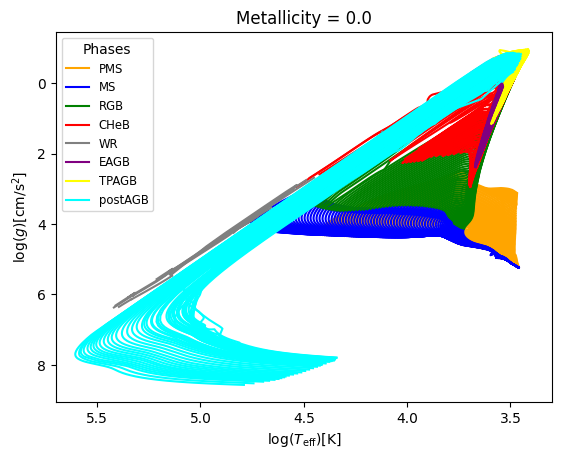

In [5]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [6]:
print_uniques("log_Teff", iso_df)
# print_uniques_count("log_Teff", iso_df)

log_Teff : 1467122 unique values, range [3.3446573874911043, 5.605500299983011]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


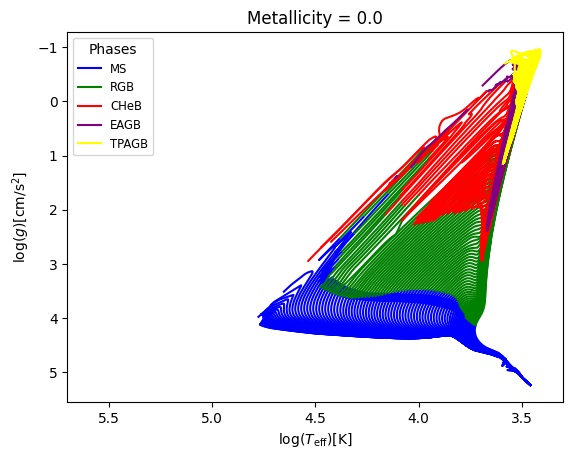

In [7]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [8]:
print_uniques("log_Teff", phase_filtered_iso_df)
# print_uniques_count("log_Teff", phase_filtered_iso_df)

log_Teff : 1140744 unique values, range [3.344668191350628, 5.378801600728572]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,6.5,3.999412,0.982118,2.0,-0.25,68.721379,2.646519
1,6.5,3.996307,0.969549,2.0,-0.25,68.720248,2.652800
2,6.5,3.993203,0.956936,2.0,-0.25,68.718795,2.659102
3,6.5,3.990098,0.944318,2.0,-0.25,68.717208,2.665406
4,6.5,3.986994,0.931690,2.0,-0.25,68.715471,2.671715
...,...,...,...,...,...,...,...
827230,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
827231,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
827232,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
827233,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


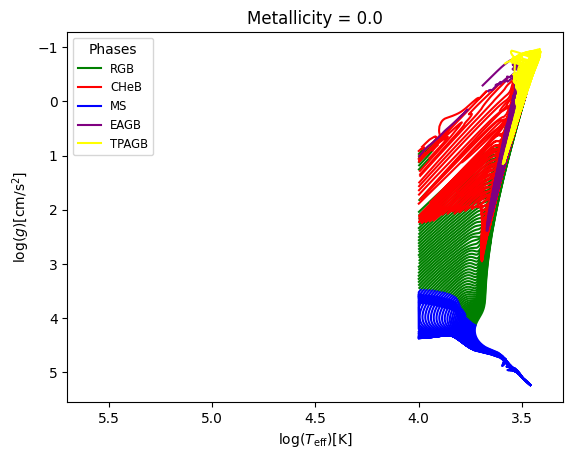

In [13]:
phase_Teff_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], 'log_Teff' : ("<", 4)})
display(phase_Teff_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_Teff_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [10]:
print_all_uniques(phase_Teff_filtered_iso_df)

log10_isochrone_age_yr  : Range : 6.45 - 10.3, Mean : 8.9612, Median : 9.0

log_Teff  : Range : 3.34 - 4.0, Mean : 3.6381, Median : 3.6117

log_g  : Range : -1.14 - 5.4331, Mean : 1.3959, Median : 0.6166

Values in phase column : 2.0, 3.0, 0.0, 4.0, 5.0 

Values in metallicity column : -0.25, -0.5, -0.75, -1.0, -1.25, -1.5, -1.75, -2.0, -2.5, -3.0, -3.5, -4.0, 0.0, 0.25, 0.5 

star_mass  : Range : 0.1 - 117.3869, Mean : 2.4687, Median : 1.4852

log_R  : Range : -1.0 - 3.1298, Mean : 1.6236, Median : 2.0136



In [11]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_Teff_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.0999979840073621 - 117.3868897830738
Median value in train data for the mass parameter: 1.4854293177243467
Mean value in train data for the mass parameter: 2.467013470663074
Range in train data for the radius parameter : -0.9974747647513328 - 3.1297545143214007
Median value in train data for the radius parameter: 2.0135574967469108
Mean value in train data for the radius parameter: 1.6232857938709038

Testing set statistics:
Range in test data for the mass parameter : 0.0999982496805748 - 116.77033340894516
Median value in test data for the mass parameter: 1.484277227847534
Mean value in test data for the mass parameter: 2.4739531515799826
Range in test data for the radius parameter : -0.99728407220846 - 3.129269620812593
Median value in test data for the radius parameter: 2.0139127878240366
Mean value in test data for the radius parameter: 1.6243760103287892

(620426, 4) (206809, 4)
(620426, 2) (206809, 2)


## Model training

### Linear regression

In [10]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


T_eff_smaller_4_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.42947760343522867
RMSE :  2.93091187147492
MAE :  1.407906486682233
MedAE :  0.8473235835862927
CORR :  0.655345407801934
MAX_ER :  104.97440616957273
Percentiles : 
  75th percentile :  1.5999512868856645
  90th percentile :  2.811841050180057
  95th percentile :  3.8184346815693964
  99th percentile :  10.905400447421583



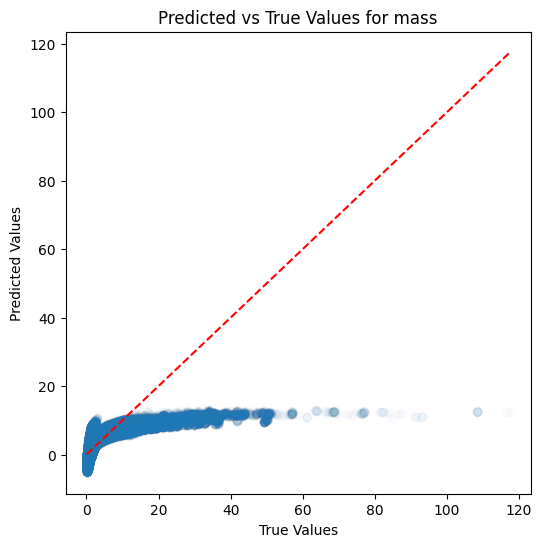

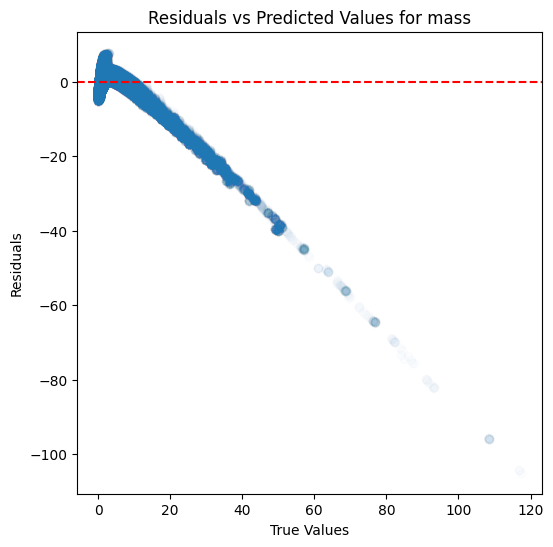

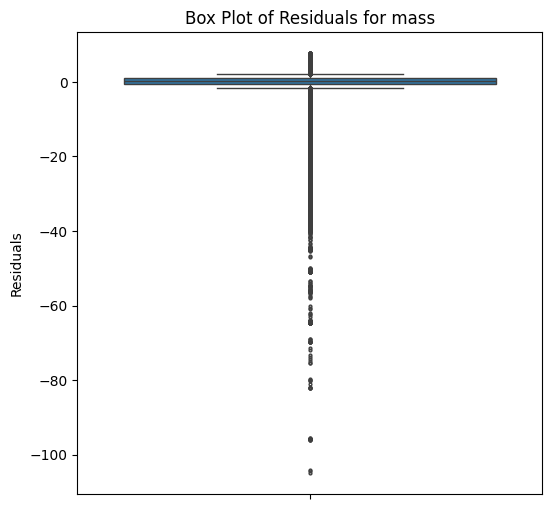

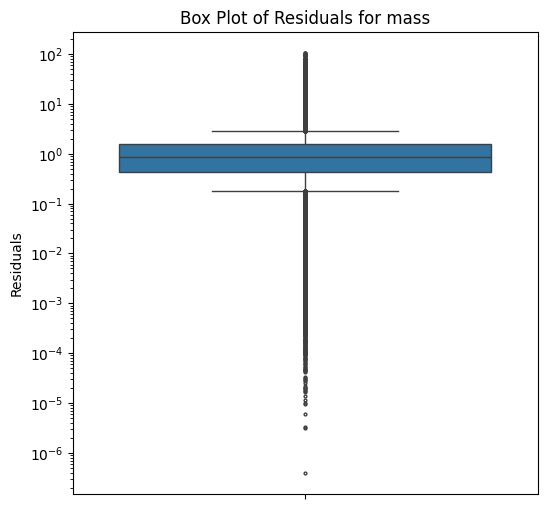

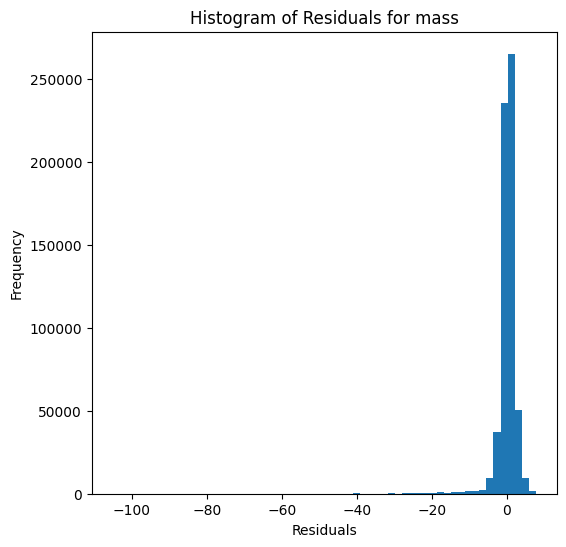

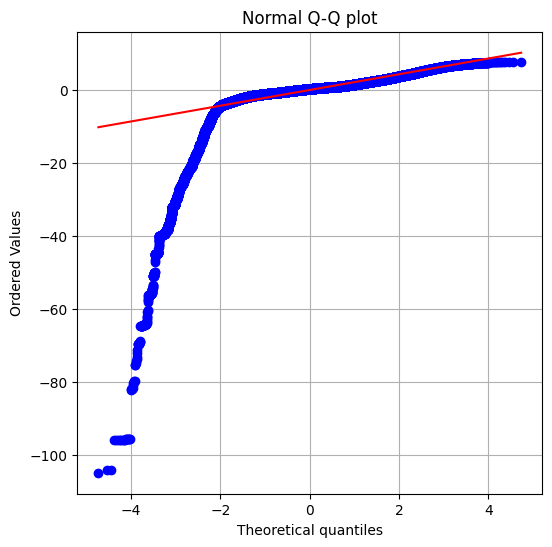


radius results:
RVE :  0.9940441783437507
RMSE :  0.07487516566358123
MAE :  0.05615273365675199
MedAE :  0.044293829975943444
CORR :  0.997017641942085
MAX_ER :  0.4345357752507817
Percentiles : 
  75th percentile :  0.07596384269537237
  90th percentile :  0.11760121815946833
  95th percentile :  0.15403815829721146
  99th percentile :  0.2412222207656931



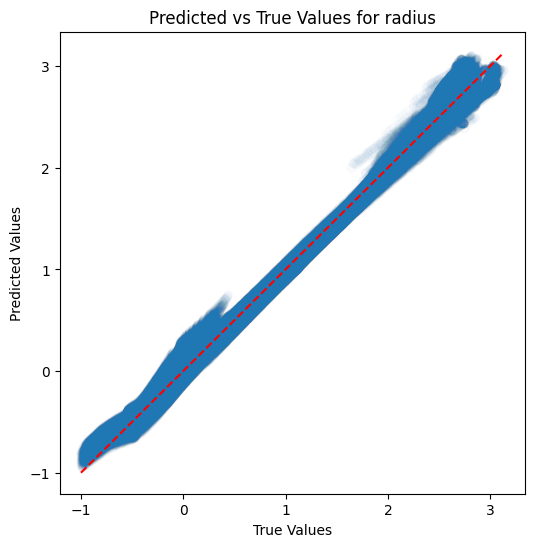

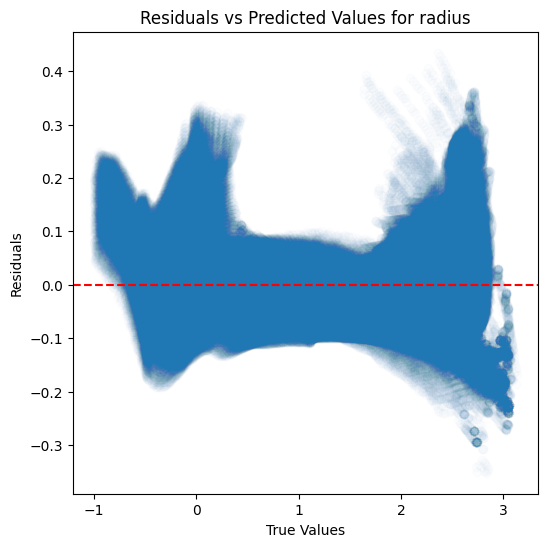

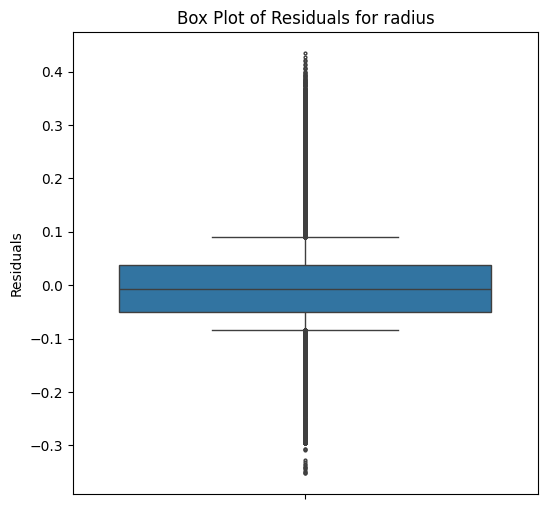

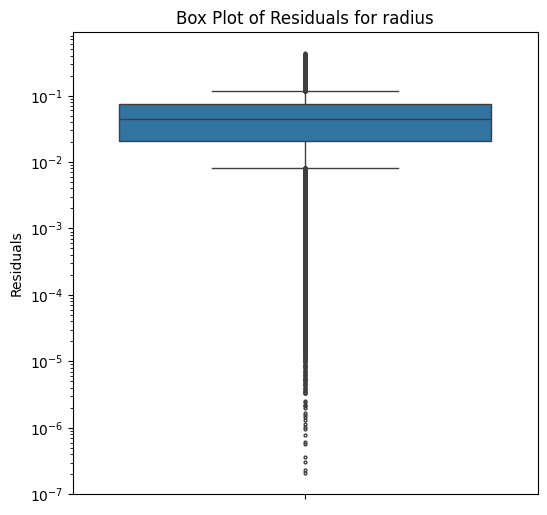

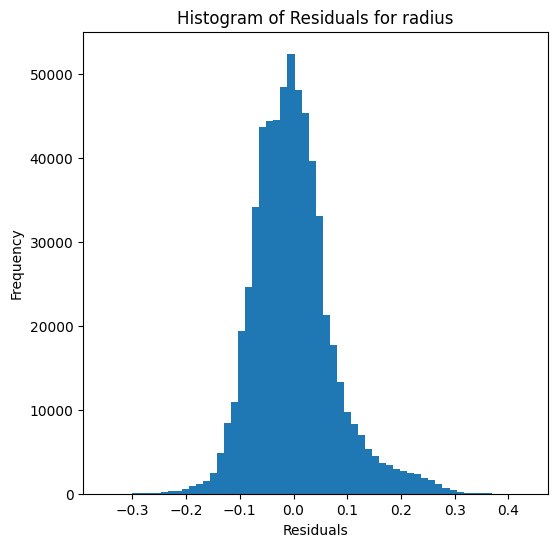

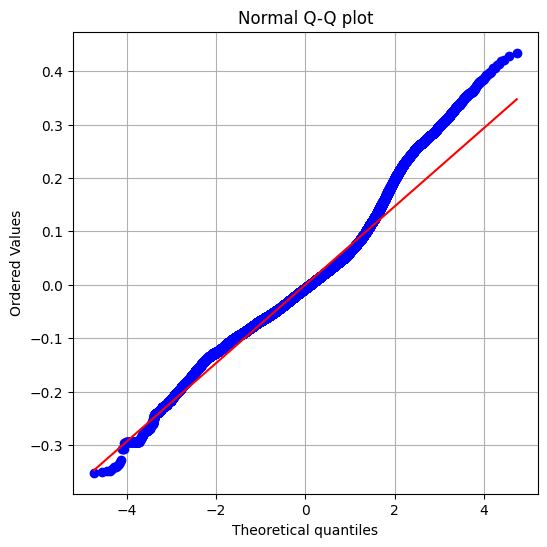

In [11]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [12]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


T_eff_smaller_4_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9985464649834759
RMSE :  0.1479395304744676
MAE :  0.03828728099055062
MedAE :  0.004718511114355006
CORR :  0.9992739412440509
MAX_ER :  19.946345406111305
Percentiles : 
  75th percentile :  0.02704869953581779
  90th percentile :  0.10542004997757443
  95th percentile :  0.19611024909497046
  99th percentile :  0.4190864240416328



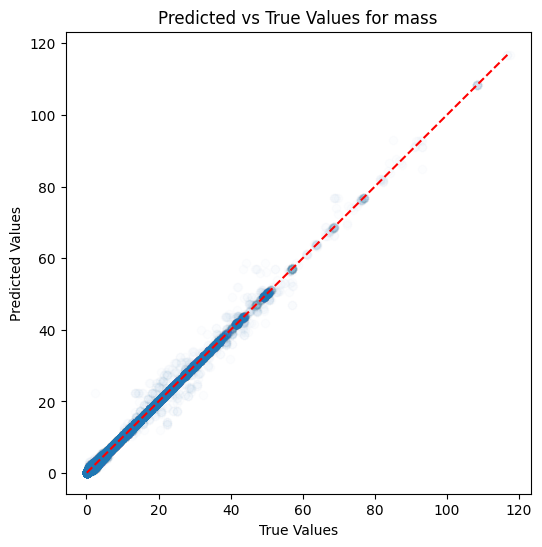

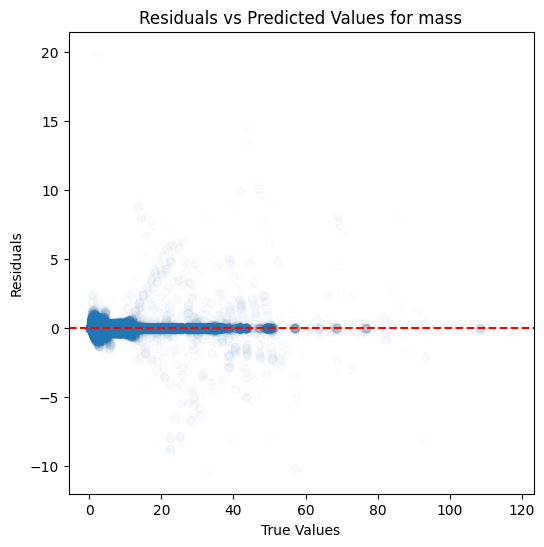

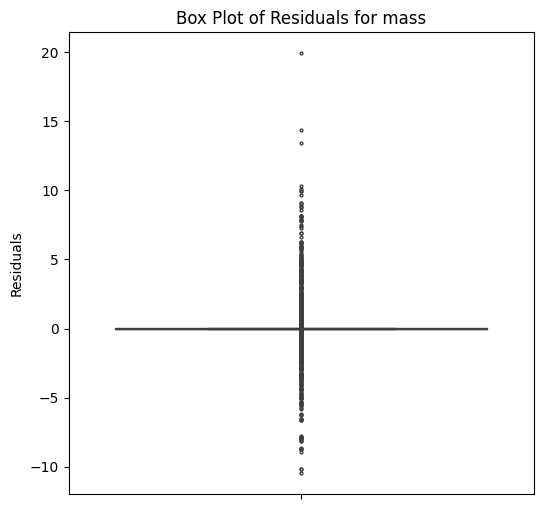

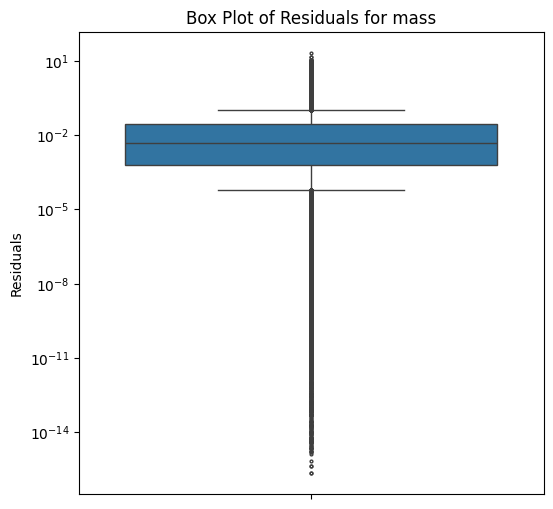

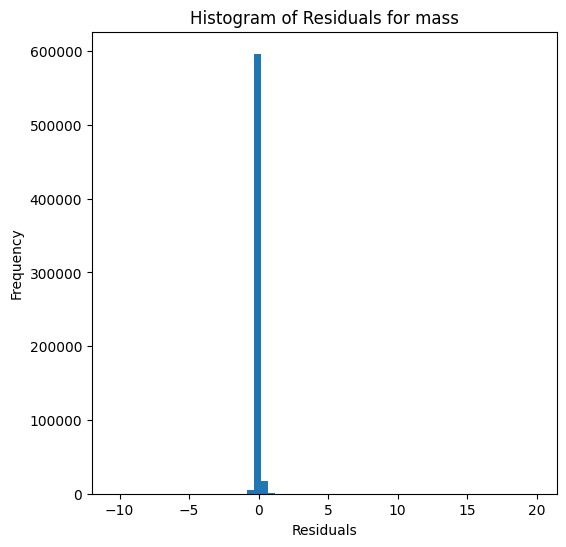

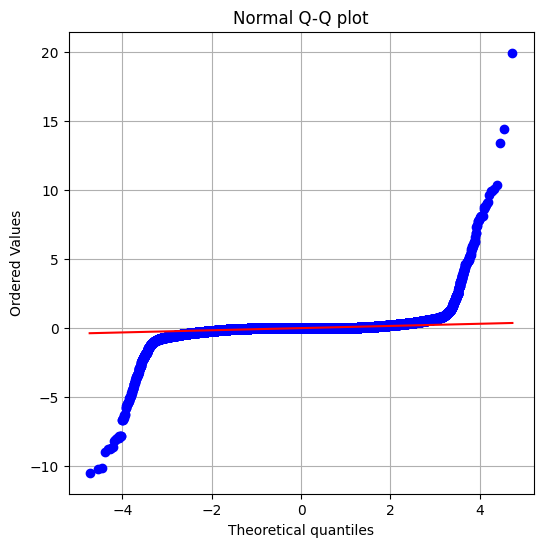


radius results:
RVE :  0.9997646853601904
RMSE :  0.014884366252847886
MAE :  0.0075582624779698526
MedAE :  0.0034318335082737933
CORR :  0.9998823708274389
MAX_ER :  2.0278824589150886
Percentiles : 
  75th percentile :  0.008617877164582122
  90th percentile :  0.017716181173555556
  95th percentile :  0.028653459896133437
  99th percentile :  0.06512684761750187



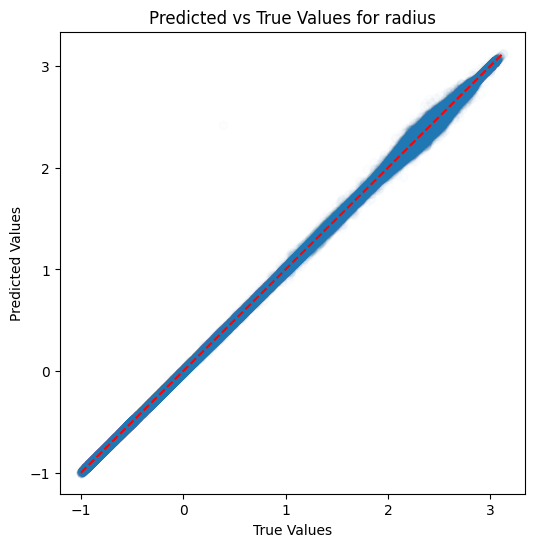

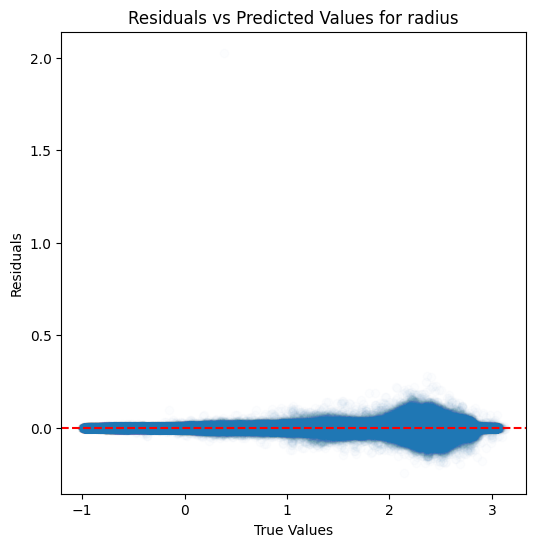

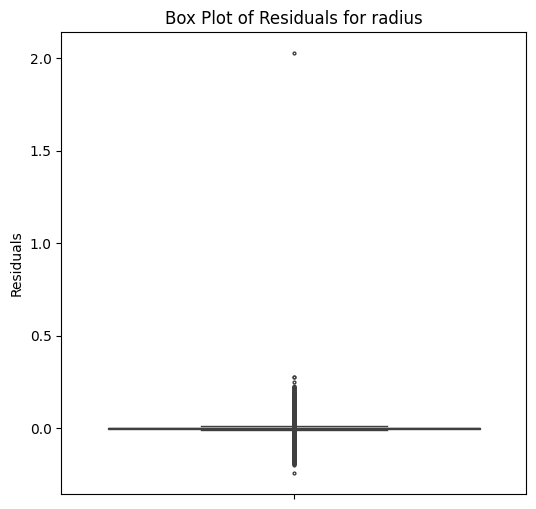

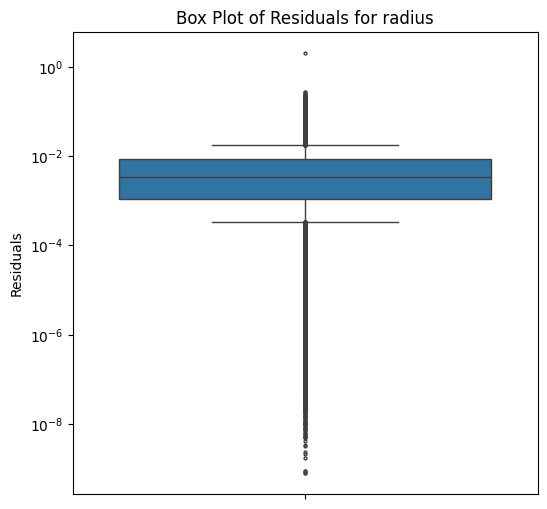

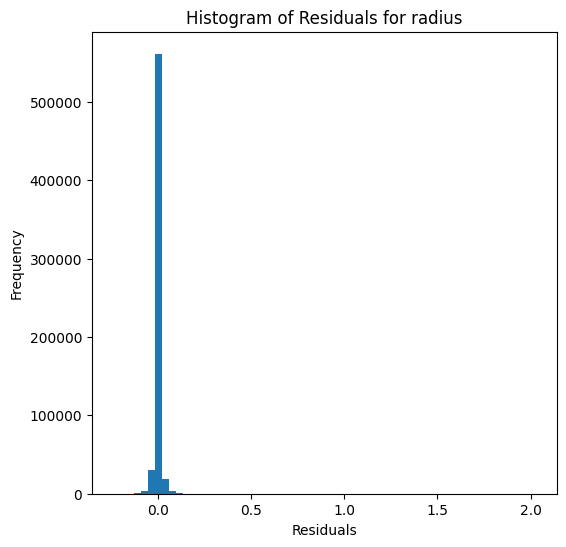

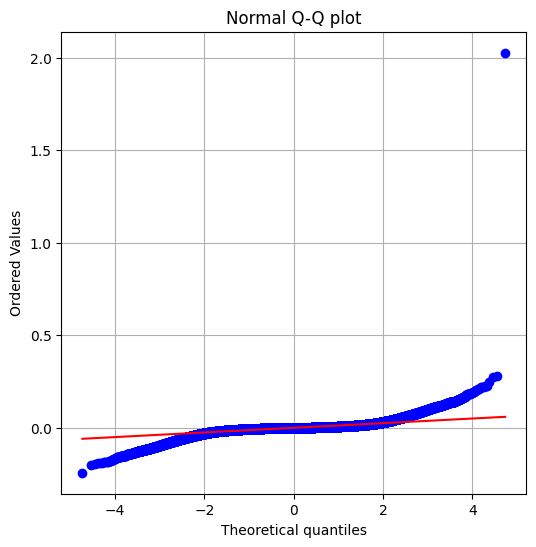

In [13]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [14]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


T_eff_smaller_4_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9971015459598264
RMSE :  0.20890543424999009
MAE :  0.053081970655782296
MedAE :  0.01323976470097038
CORR :  0.9985541345647484
MAX_ER :  40.43951877186741
Percentiles : 
  75th percentile :  0.05663405531979296
  90th percentile :  0.14354518160750596
  95th percentile :  0.21914331583832736
  99th percentile :  0.4408893168256526



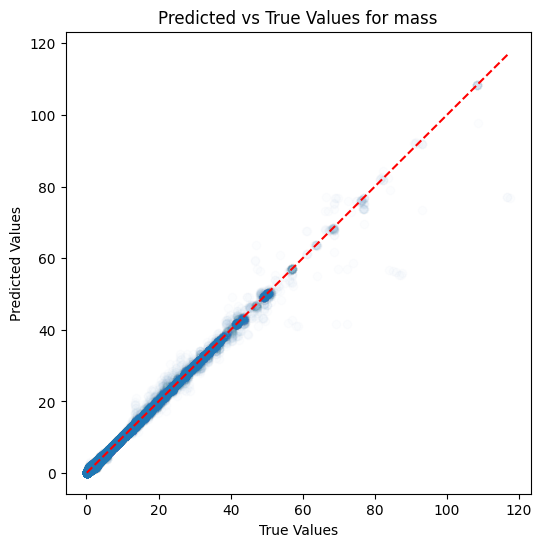

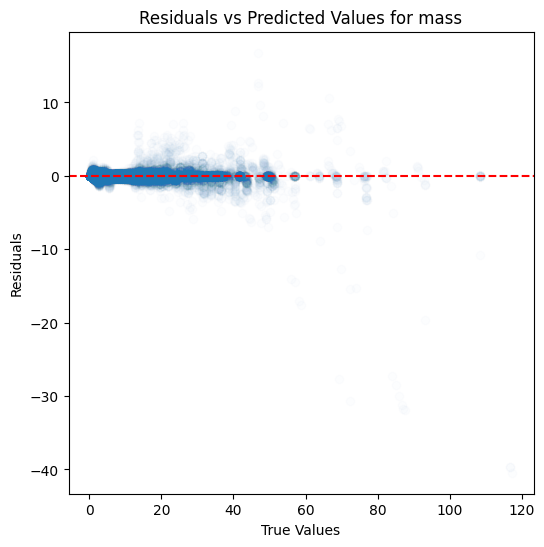

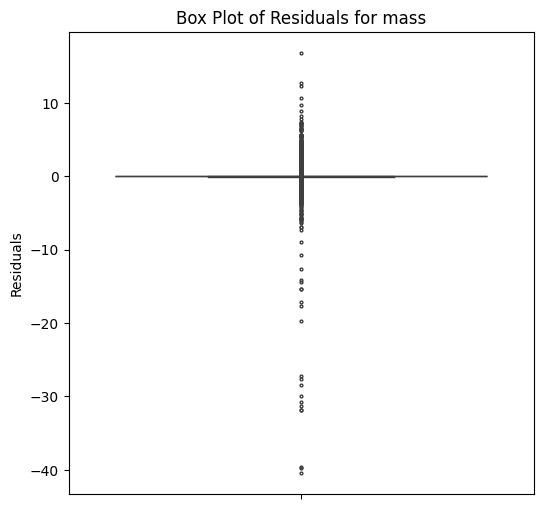

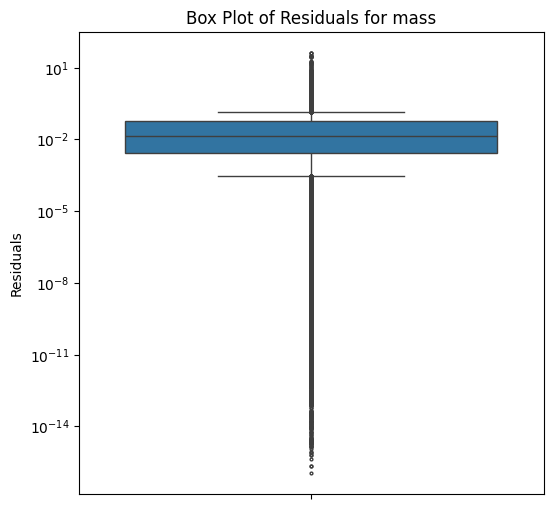

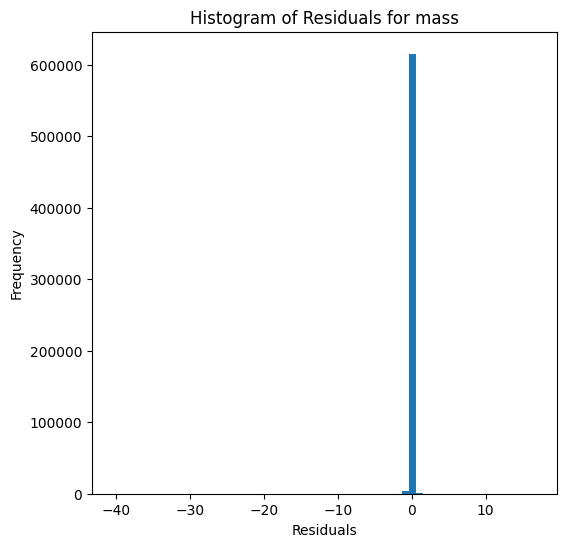

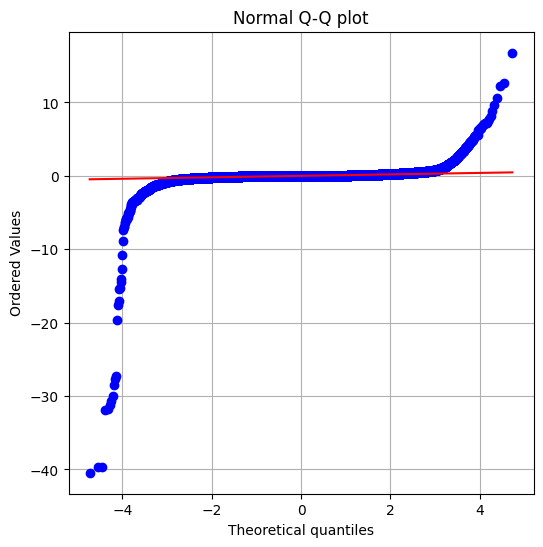


radius results:
RVE :  0.9998062106292361
RMSE :  0.013509284321516168
MAE :  0.007381414029682498
MedAE :  0.003553027287441113
CORR :  0.9999031048833888
MAX_ER :  0.23865793440928496
Percentiles : 
  75th percentile :  0.00846851374527735
  90th percentile :  0.018231586991192428
  95th percentile :  0.028493890141464417
  99th percentile :  0.056881062380216285



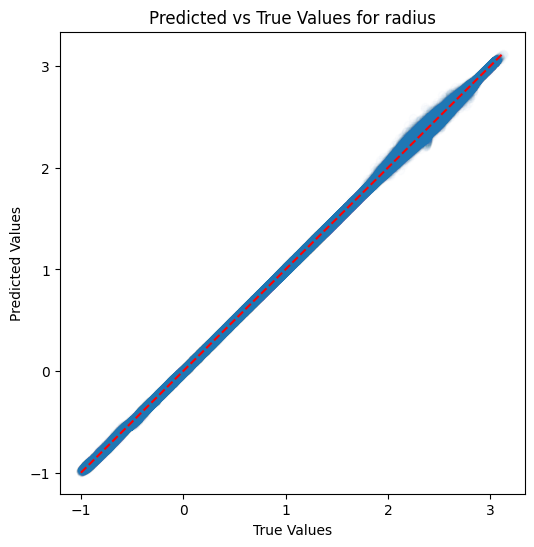

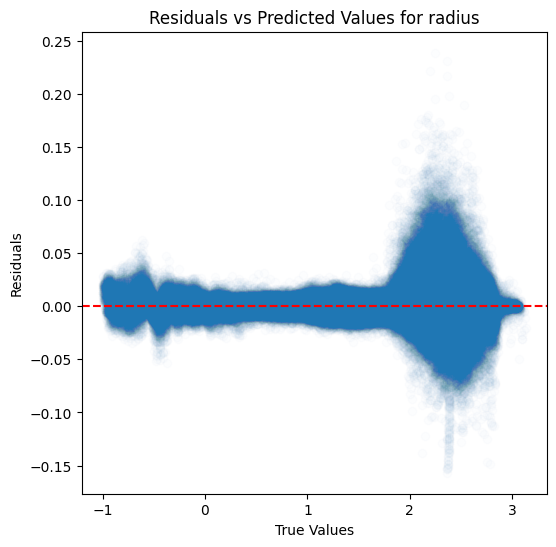

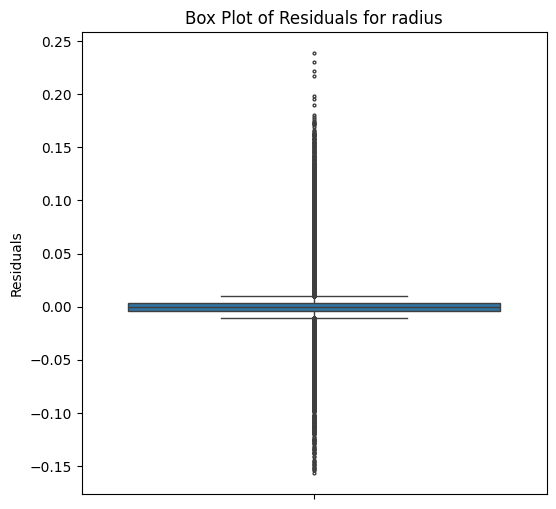

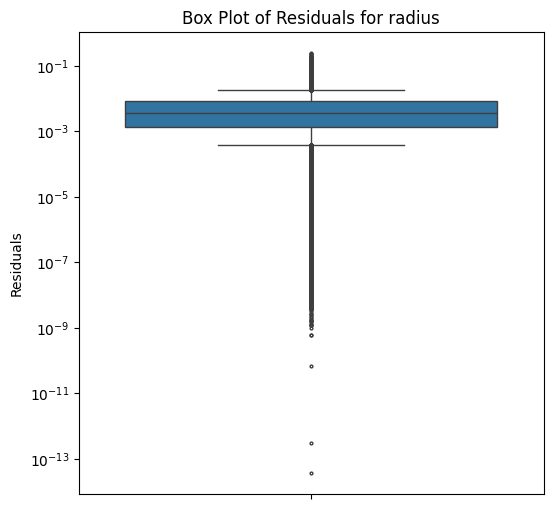

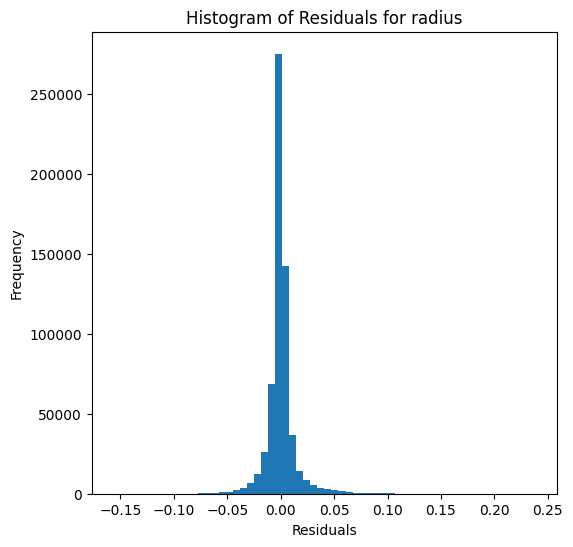

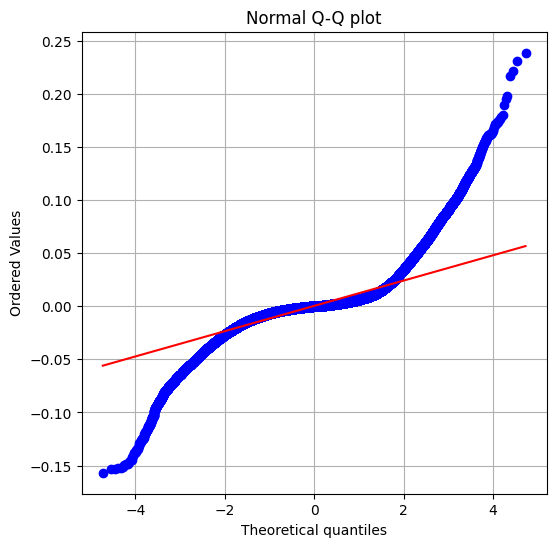

In [15]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [16]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


T_eff_smaller_4_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9991202595658606
RMSE :  0.11509356404788106
MAE :  0.03479319081165478
MedAE :  0.008073024301950449
CORR :  0.9995600774874132
MAX_ER :  11.959957133572864
Percentiles : 
  75th percentile :  0.033516786661700826
  90th percentile :  0.09293458642447483
  95th percentile :  0.1501292073315011
  99th percentile :  0.3159725385238993



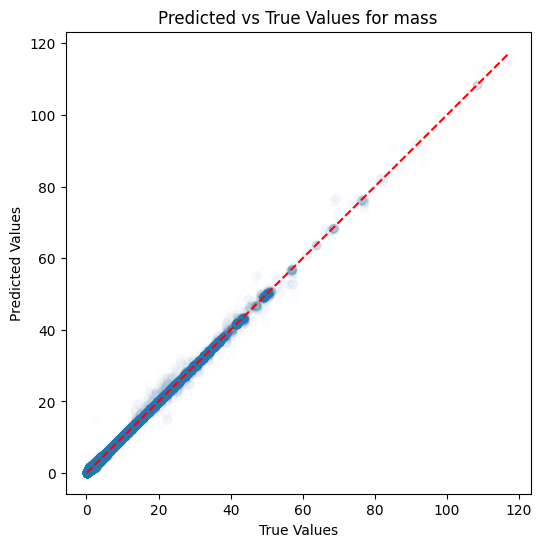

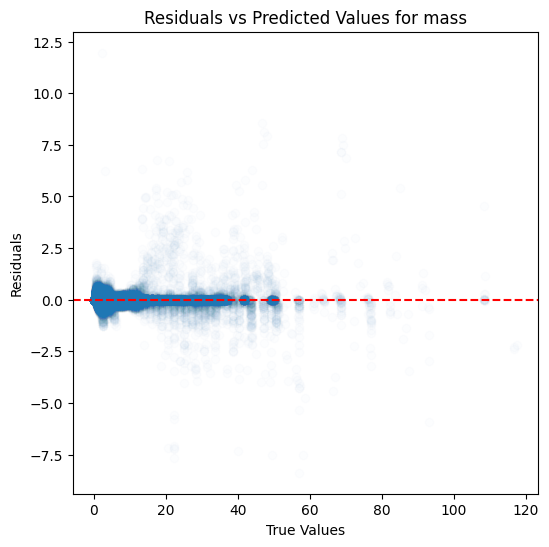

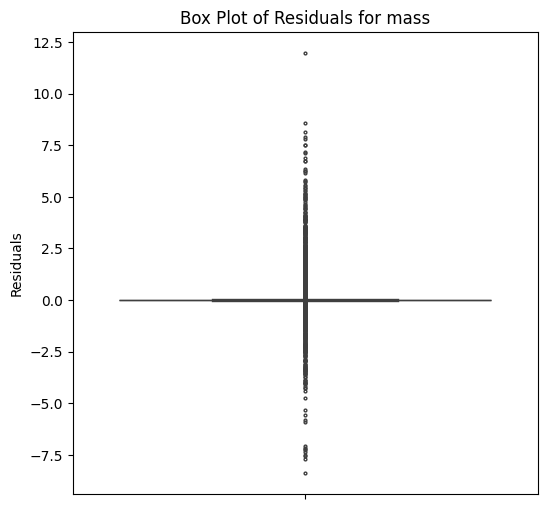

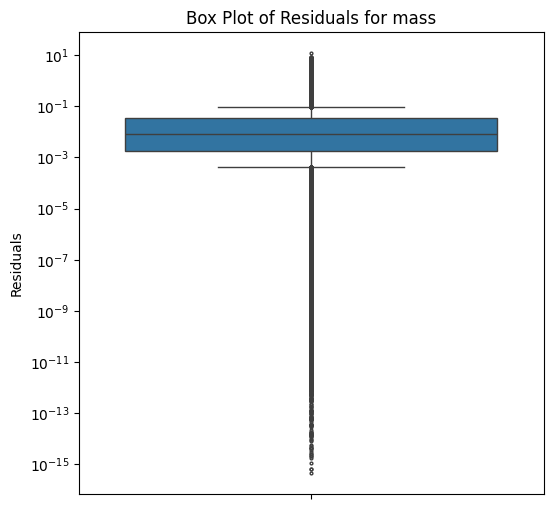

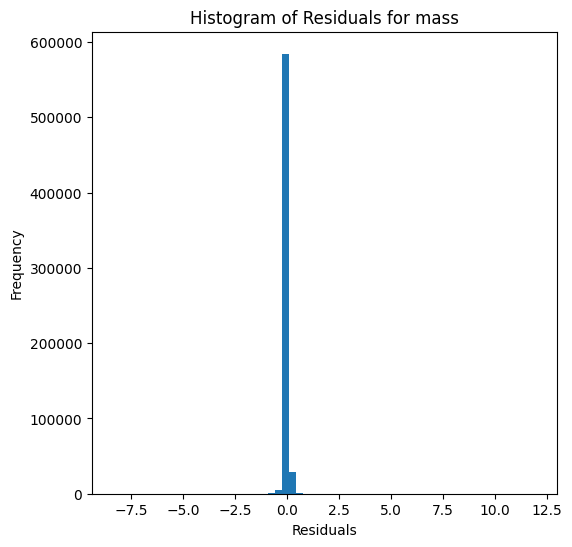

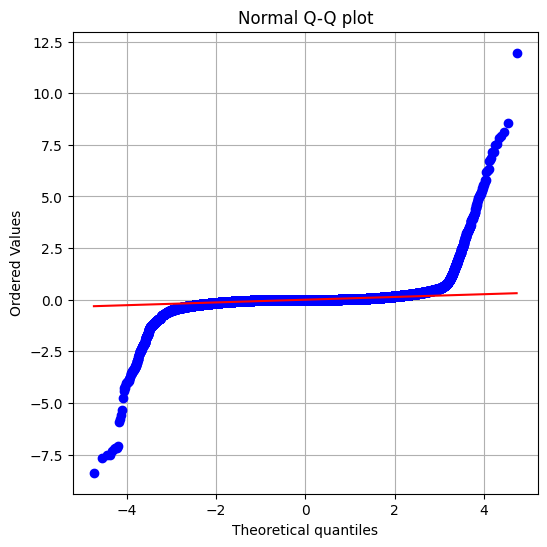


radius results:
RVE :  0.9998846425951273
RMSE :  0.010422081803899207
MAE :  0.005177513263480905
MedAE :  0.002078897680359914
CORR :  0.9999423261870403
MAX_ER :  1.2455598317561498
Percentiles : 
  75th percentile :  0.005827391447292551
  90th percentile :  0.013139869775240731
  95th percentile :  0.02048218767066612
  99th percentile :  0.0444135811334222



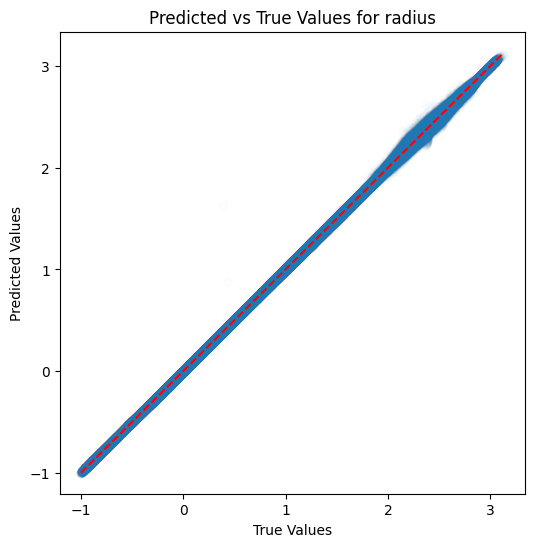

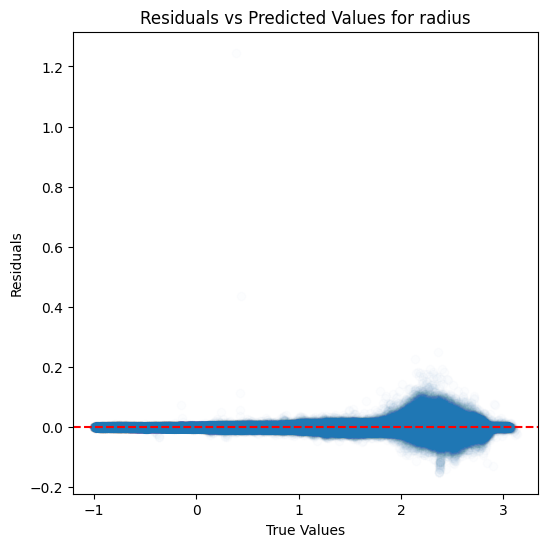

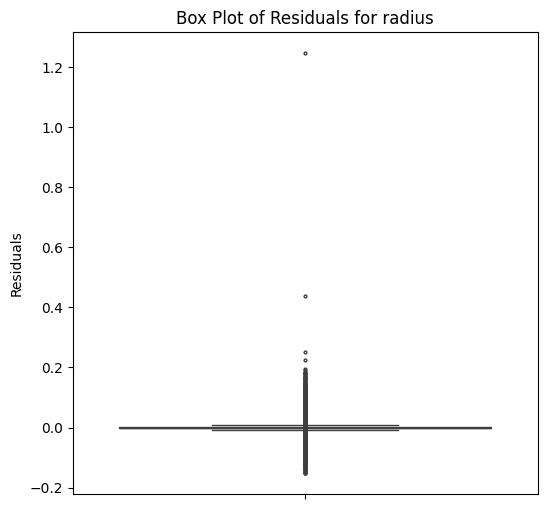

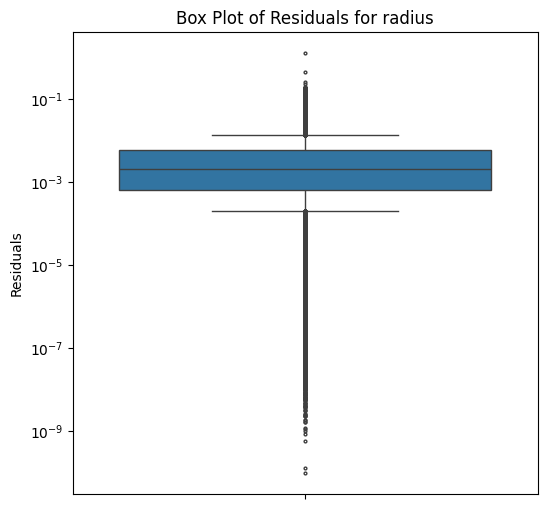

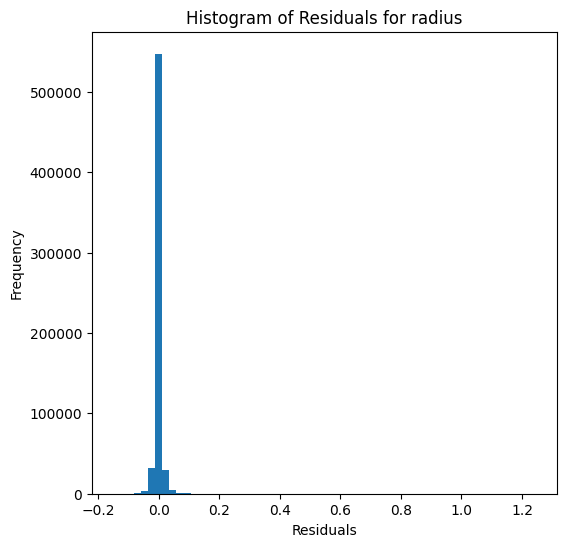

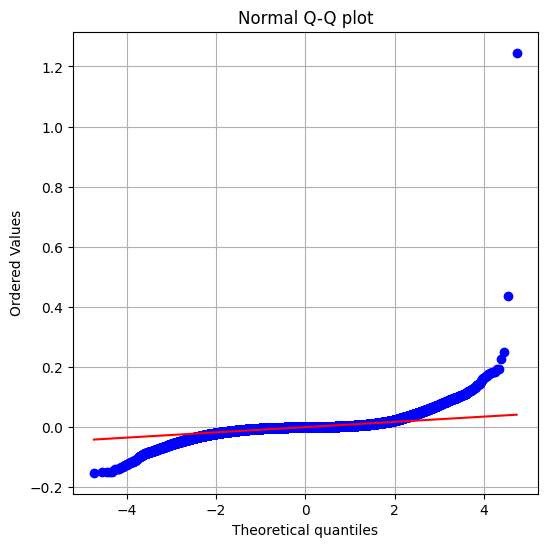

In [17]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [18]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


T_eff_smaller_4_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9984644909674172
RMSE :  0.15205216201659125
MAE :  0.08327431213295373
MedAE :  0.04547079768469714
CORR :  0.9992319698027695
MAX_ER :  14.164325152068965
Percentiles : 
  75th percentile :  0.10731663845164308
  90th percentile :  0.2019084891563554
  95th percentile :  0.27985958597152893
  99th percentile :  0.4777163274698911



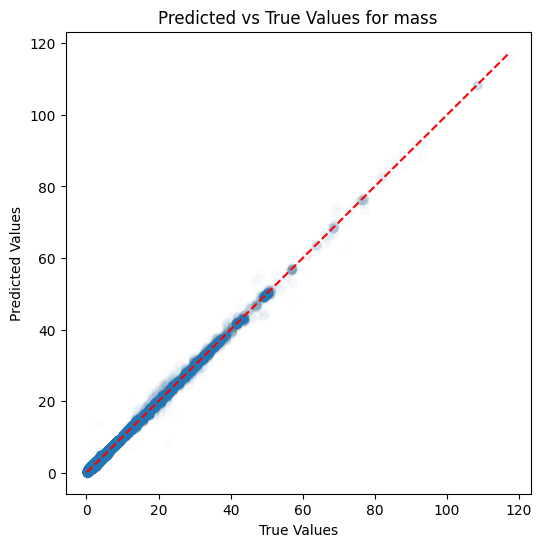

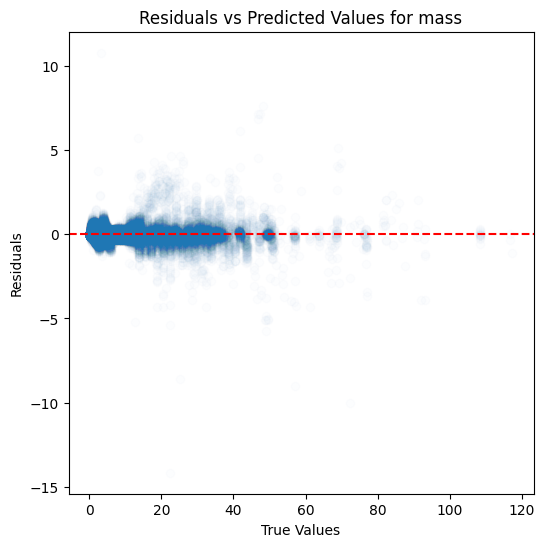

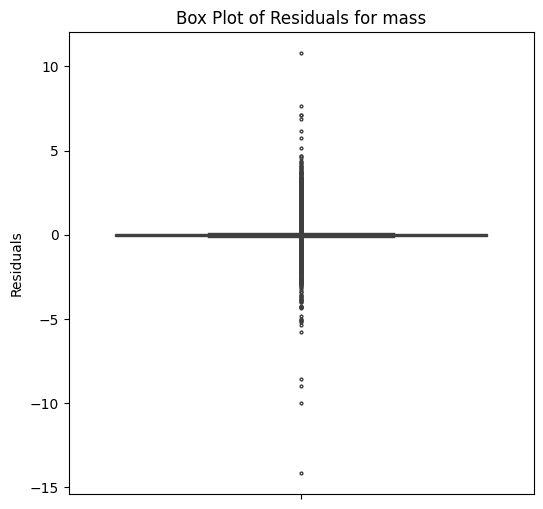

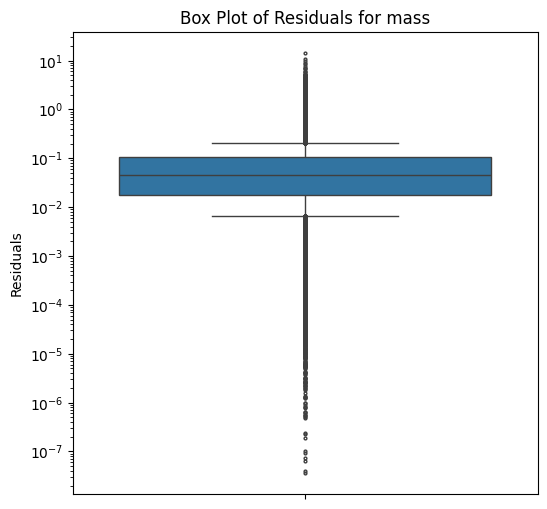

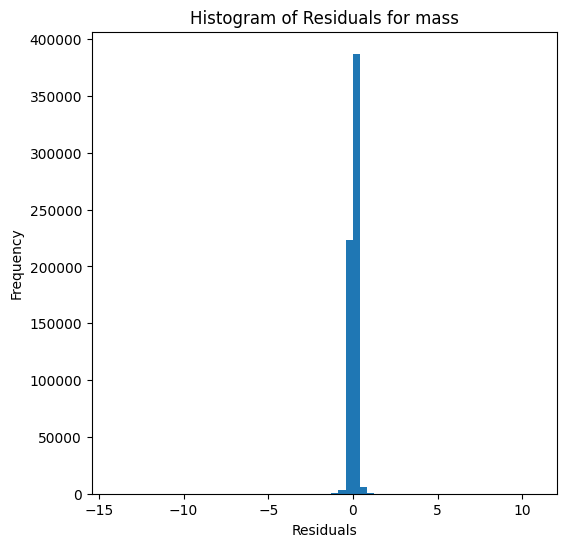

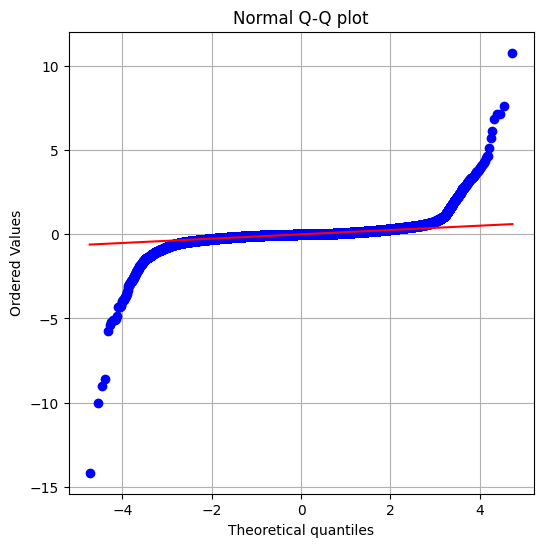


radius results:
RVE :  0.9996789635685774
RMSE :  0.017383784157926522
MAE :  0.01250288771623493
MedAE :  0.009225489701915945
CORR :  0.9998394699396418
MAX_ER :  0.20730010249393338
Percentiles : 
  75th percentile :  0.016830926290733905
  90th percentile :  0.02693301262008463
  95th percentile :  0.03518964368711175
  99th percentile :  0.058265725241247845



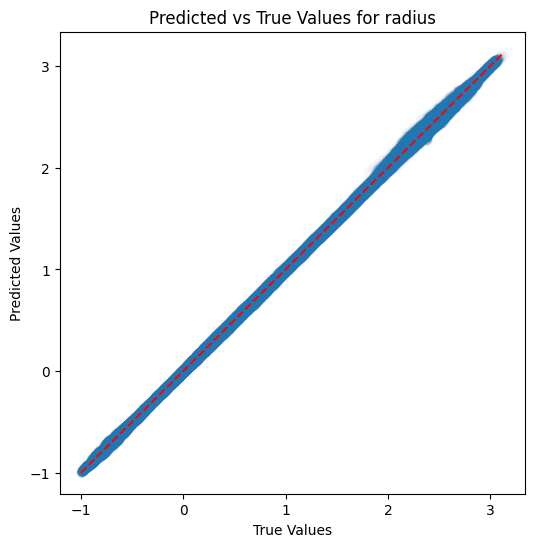

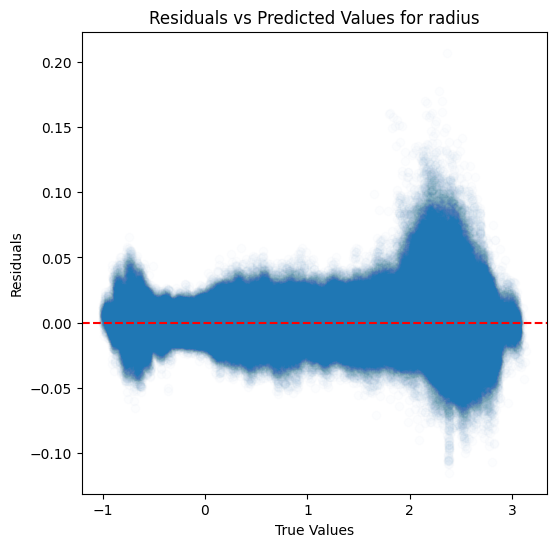

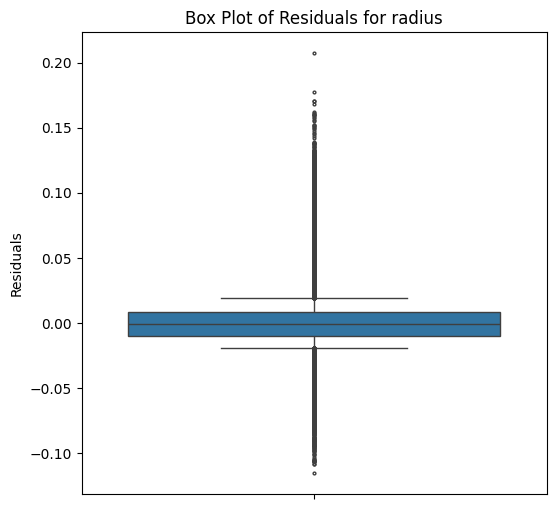

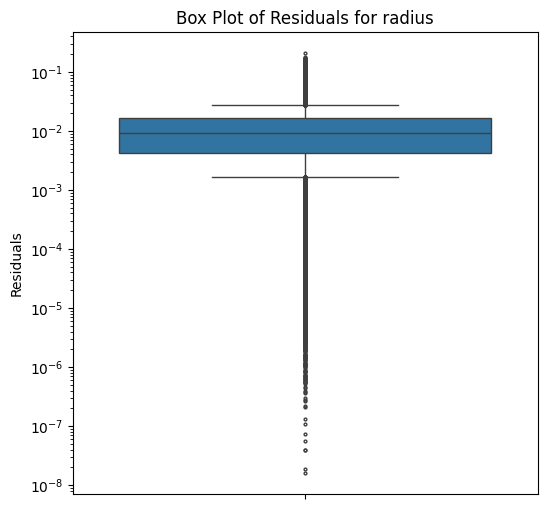

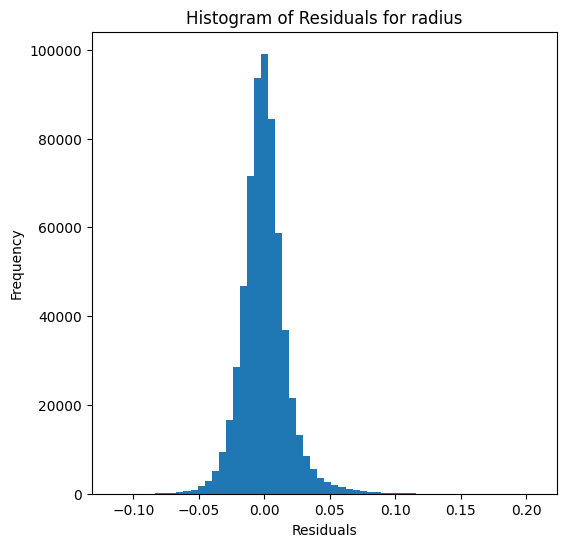

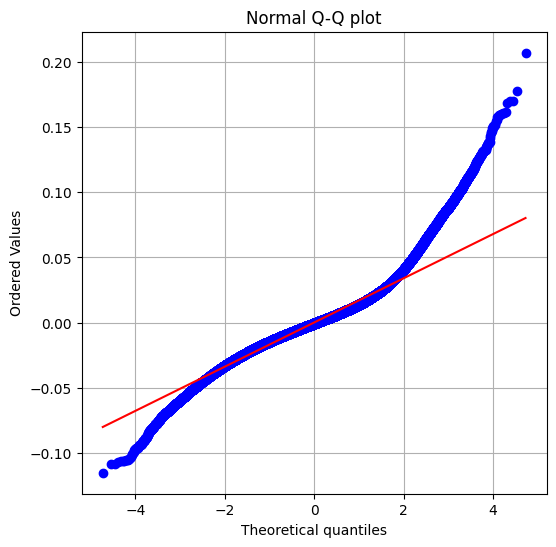

In [19]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [10]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


T_eff_smaller_4_5 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.05534067353538116
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.06274758656682707
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.06664702736784311
4 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.06989814816447636
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.07108626458529083

mass results:
RVE :  0.9813829328085342
RMSE :  0.5356061173121461
MAE :  0.18602302968255416
MedAE :  0.10116730037634203
CORR :  0.990672456337969
MAX_ER :  36.39333114067181
Percentiles : 
  75th percentile :  0.19658330293939352
  90th percentile :  0.35152004402886905
  95th percentile :  0.5028729131841122
  99th percentile :  1.4285463471114597



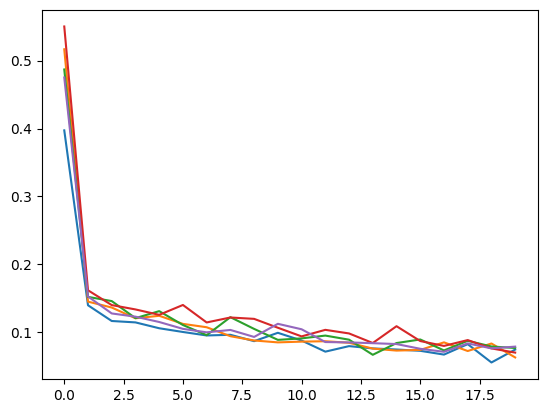

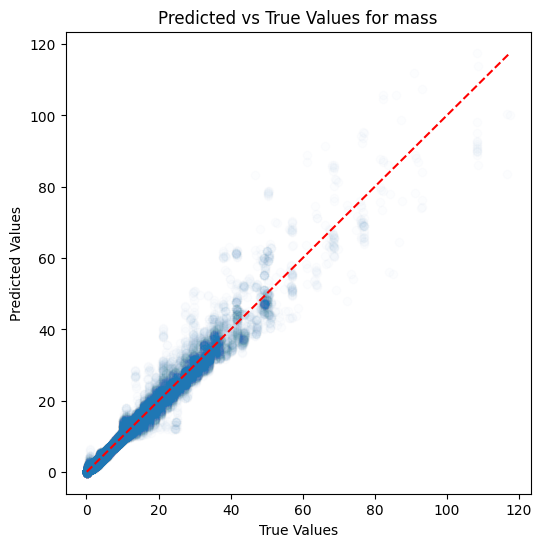

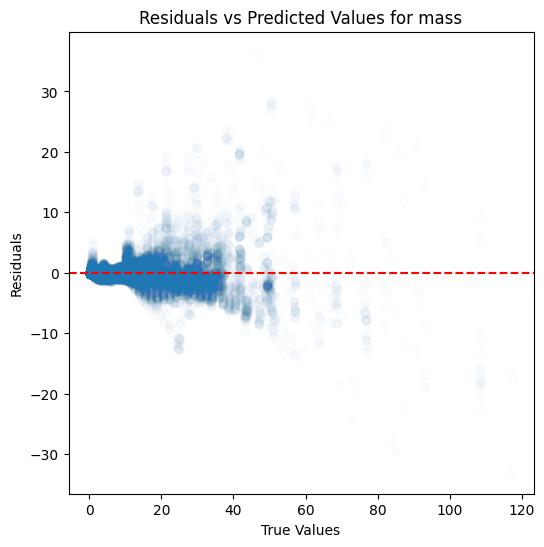

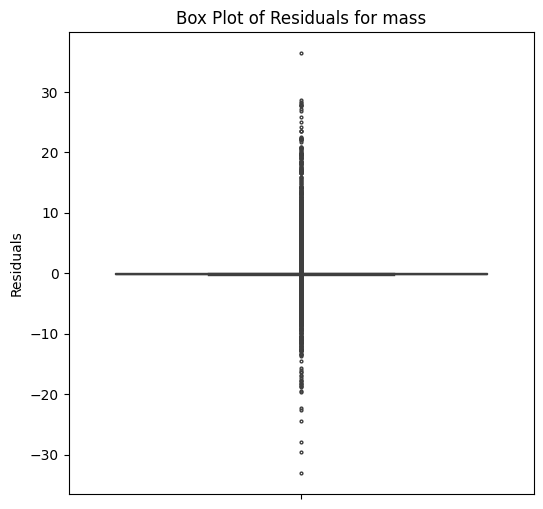

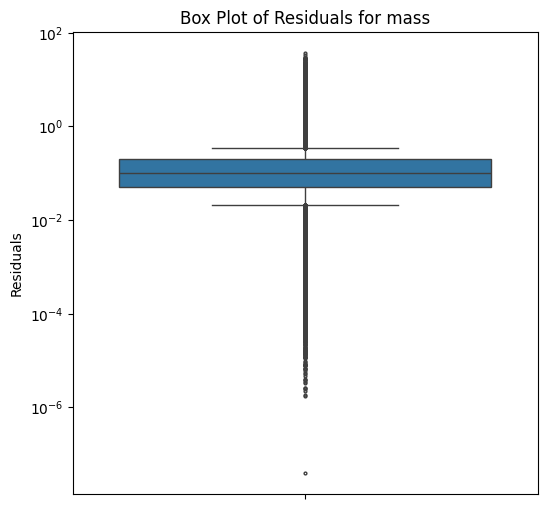

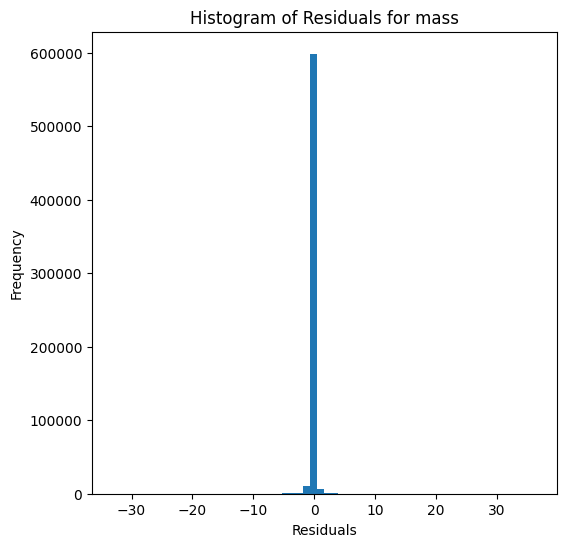

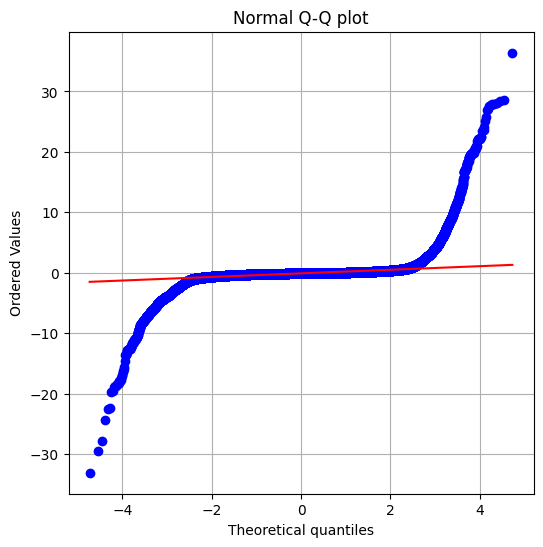


radius results:
RVE :  0.997433872588526
RMSE :  0.05442576985983256
MAE :  0.04162025397906637
MedAE :  0.035108942656962405
CORR :  0.998717840547722
MAX_ER :  1.0682793558242372
Percentiles : 
  75th percentile :  0.0571544310051485
  90th percentile :  0.08206714100543044
  95th percentile :  0.10135769006830093
  99th percentile :  0.15616398067969506



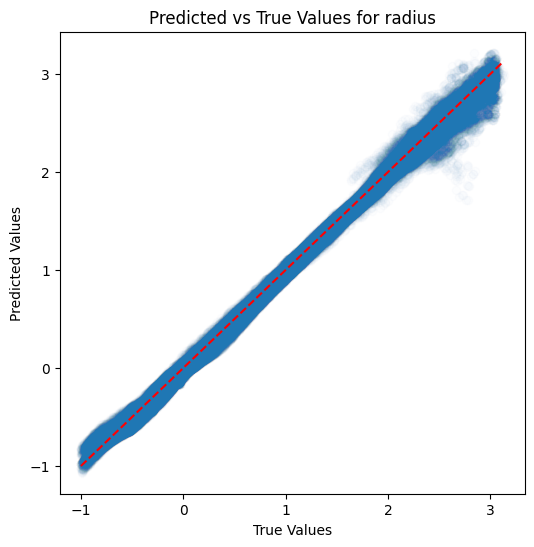

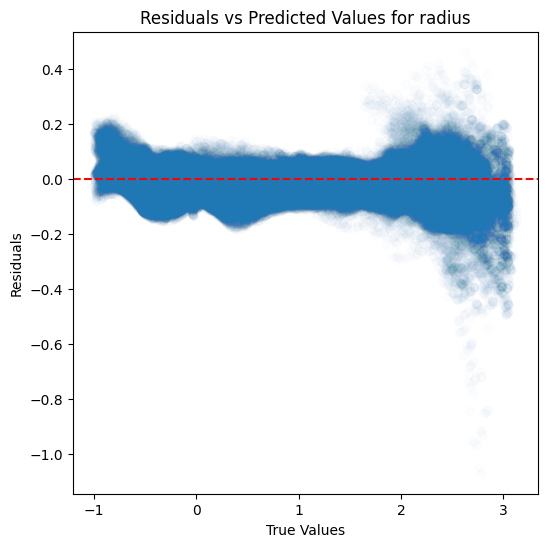

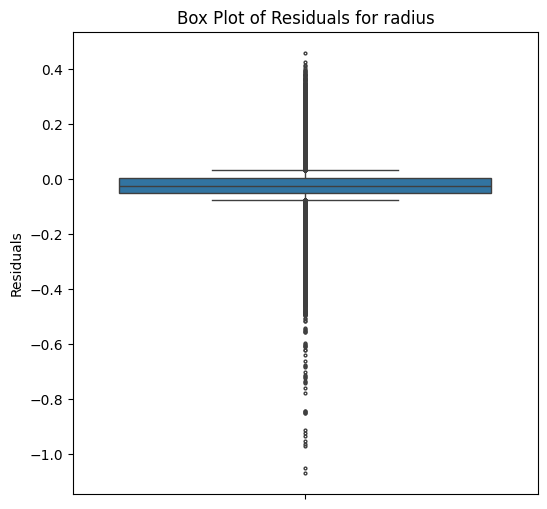

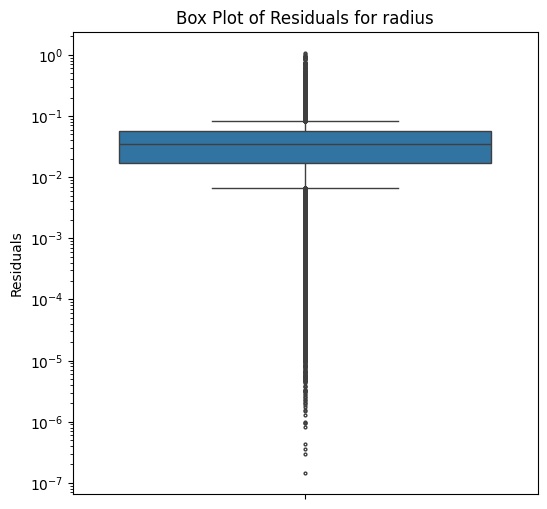

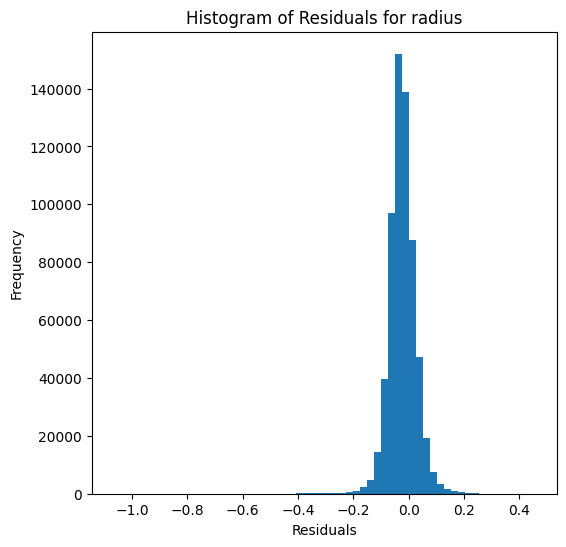

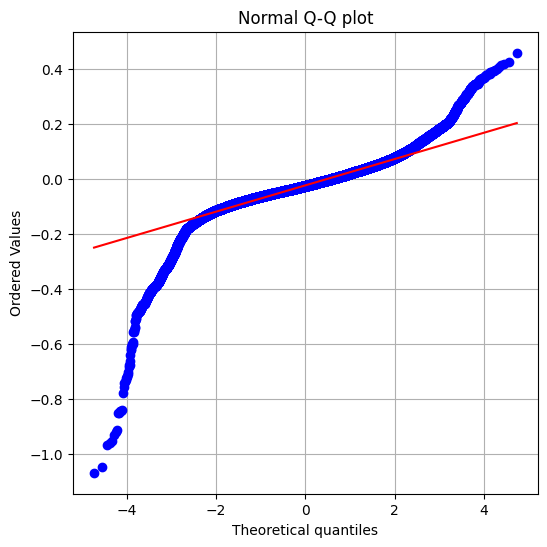

In [11]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)